# 单变量线性回归

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# 导入数据，并查看
path = 'ex1data1.txt'
names = ['Population', 'Profit']
data = pd.read_csv(path, header=None, names=names)
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [99]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


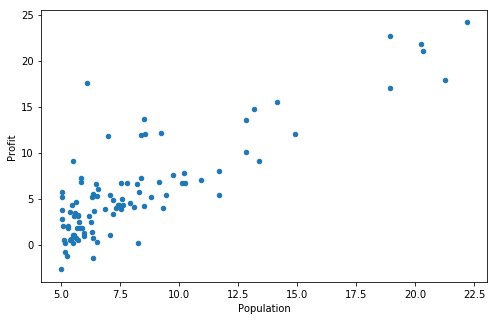

In [100]:
# 在开始任何任务之前，通过可视化来理解数据通常是有用的。
# 对于这个数据集，可以使用散点图来可视化数据，因为它只有两个属性(利润和人口)。
# (在现实生活中遇到的许多其他问题都是多维度的，不能在二维图上画出来。)
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8, 5))
plt.show()

In [101]:
# 使用梯度下降来实现线性回归，以最小化成本函数

In [102]:
# 计算代价函数
def computeCost(X, y, theta):
    return np.sum(np.power(X.dot(theta.T)-y, 2))/(2*len(X))

In [103]:
# 在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度
data.insert(0, 'Ones', 1)

In [104]:
# 变量初始化
# set X (training data) and y (target variable)
cols = data.shape[1]  # 列数
X = data.iloc[:, 0:cols-1]  # 取前cols-1列，即输入向量
y = data.iloc[:, cols-1:cols]  # 取最后一列，即目标向量

In [105]:
# 观察下 X (训练集) and y (目标变量)是否正确
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [106]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [107]:
# 转换X和Y，初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0, 0])
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [108]:
# 算初始代价函数的值 (theta初始值为0)
computeCost(X, y, theta)

32.072733877455676

In [109]:
# batch gradient decent（批量梯度下降）
def gradientDescent(X, y, theta, alpha, epoch):
    temp = np.matrix(np.zeros(theta.shape))  # 初始化一个 θ 临时矩阵
    cost = np.zeros(epoch)  # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]  # 样本数量m

    for i in range(epoch):
        temp = theta - (alpha/m)*np.dot((X.dot(theta.T)-y).T, X)
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [110]:
# 初始化一些附加变量 - 学习速率α和要执行的迭代次数
alpha = 0.01
epoch = 1000

In [111]:
# 运行梯度下降算法来使参数θ适合于训练集
final_theta, cost = gradientDescent(X, y, theta, alpha, epoch)
final_theta

matrix([[-3.24140214,  1.1272942 ]])

In [112]:
# 使用拟合的参数计算训练模型的代价函数（误差）
computeCost(X, y, final_theta)

4.515955503078912

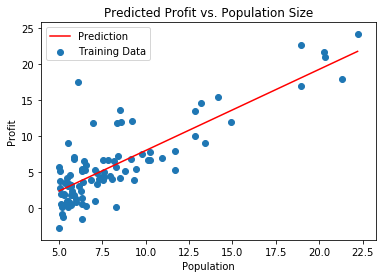

In [113]:
# 绘制线性模型以及数据，直观地看出它的拟合
x = np.linspace(data.Population.min(), data.Population.max(), 100)  # 横坐标
f = final_theta[0, 0]+(final_theta[0, 1]*x)  # 纵坐标

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc='best')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

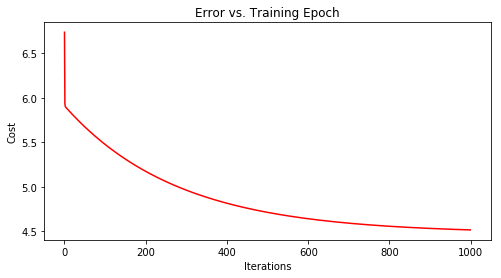

In [114]:
# 由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，线性回归中的代价函数总是降低的 - 这是凸优化问题的一个例子。
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [115]:
path = 'ex1data2.txt'
names = ['Size', 'Bedrooms', 'Price']
data2 = pd.read_csv(path, header=None, names=names)
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [116]:
# 特征归一化
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [117]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0, 0, 0]))

# perform linear regression on the data set
final_theta2, cost2=gradientDescent(X2, y2, theta2, alpha, epoch)

# get the cost (error) of the model
computeCost(X2, y2, final_theta2)
final_theta2

matrix([[-1.10975059e-16,  8.78503652e-01, -4.69166570e-02]])

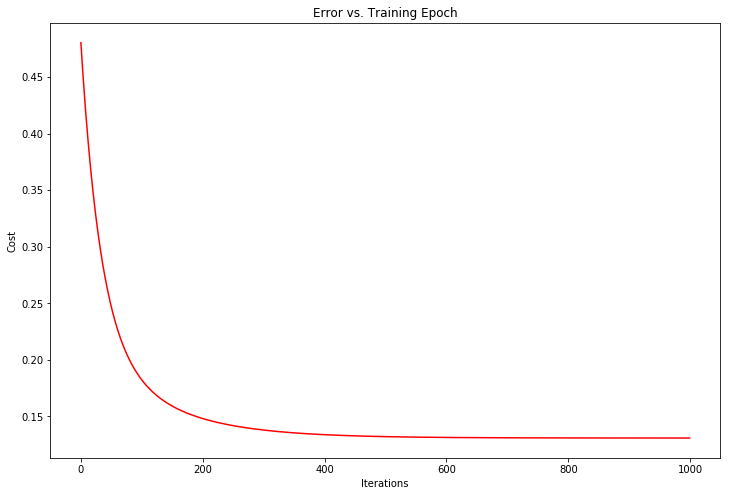

In [118]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(epoch),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [119]:
# # 使用scikit-learn的线性回归函数，而不是从头开始实现这些算法
# from sklearn import  linear_model
# model=linear_model.LinearRegression()
# model.fit(X,y)

# normal equation（正规方程）

In [120]:
# 正规方程
def normalEqn(X,y):
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [121]:
fintheta=normalEqn(X,y)
fintheta

matrix([[-3.89578088],
        [ 1.19303364]])